In [ ]:
import pandas as pd
import numpy
import seaborn as sns

In [ ]:
data = pd.read_csv('phishing_site_urls.csv')
print(data.shape)
data.head()


(549346, 2)


,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

proportions = data['Label'].value_counts(normalize=True)


target_rows_good = int(proportions['good'] * 100000)
target_rows_bad = int(proportions['bad'] * 100000)


good_data = data[data['Label'] == 'good'].sample(target_rows_good)
bad_data = data[data['Label'] == 'bad'].sample(target_rows_bad)


undersampled_data = pd.concat([good_data, bad_data])


data = undersampled_data.sample(frac=1).reset_index(drop=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URL     99999 non-null  object
 1   Label   99999 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Label'] = encoder.fit_transform(data['Label'])

In [ ]:
data.head()


,URL,Label
0,vitals.com/doctors/Dr_Wayne_Nelson.html,1
1,www.520168.cn/style/?us.battle.net/login/en/?r...,0
2,193.124.180.6/upload/_dispatch.php,0
3,home.earthlink.net/~mikhoc/,1
4,ilcockerrescue.org/memorialspage.htm,1


In [ ]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
data.duplicated().sum()


1782

In [ ]:
data = data.drop_duplicates(keep='first')


In [ ]:
data.head()

,URL,Label
0,vitals.com/doctors/Dr_Wayne_Nelson.html,1
1,www.520168.cn/style/?us.battle.net/login/en/?r...,0
2,193.124.180.6/upload/_dispatch.php,0
3,home.earthlink.net/~mikhoc/,1
4,ilcockerrescue.org/memorialspage.htm,1


In [ ]:
data.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
data.shape

(98217, 2)

In [ ]:
data['Label'].value_counts()

1    71523
0    26694
Name: Label, dtype: int64

In [ ]:
data.describe()

,Label
count,98217.000000
mean,0.728214
std,0.444882
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
import matplotlib.pyplot as plt

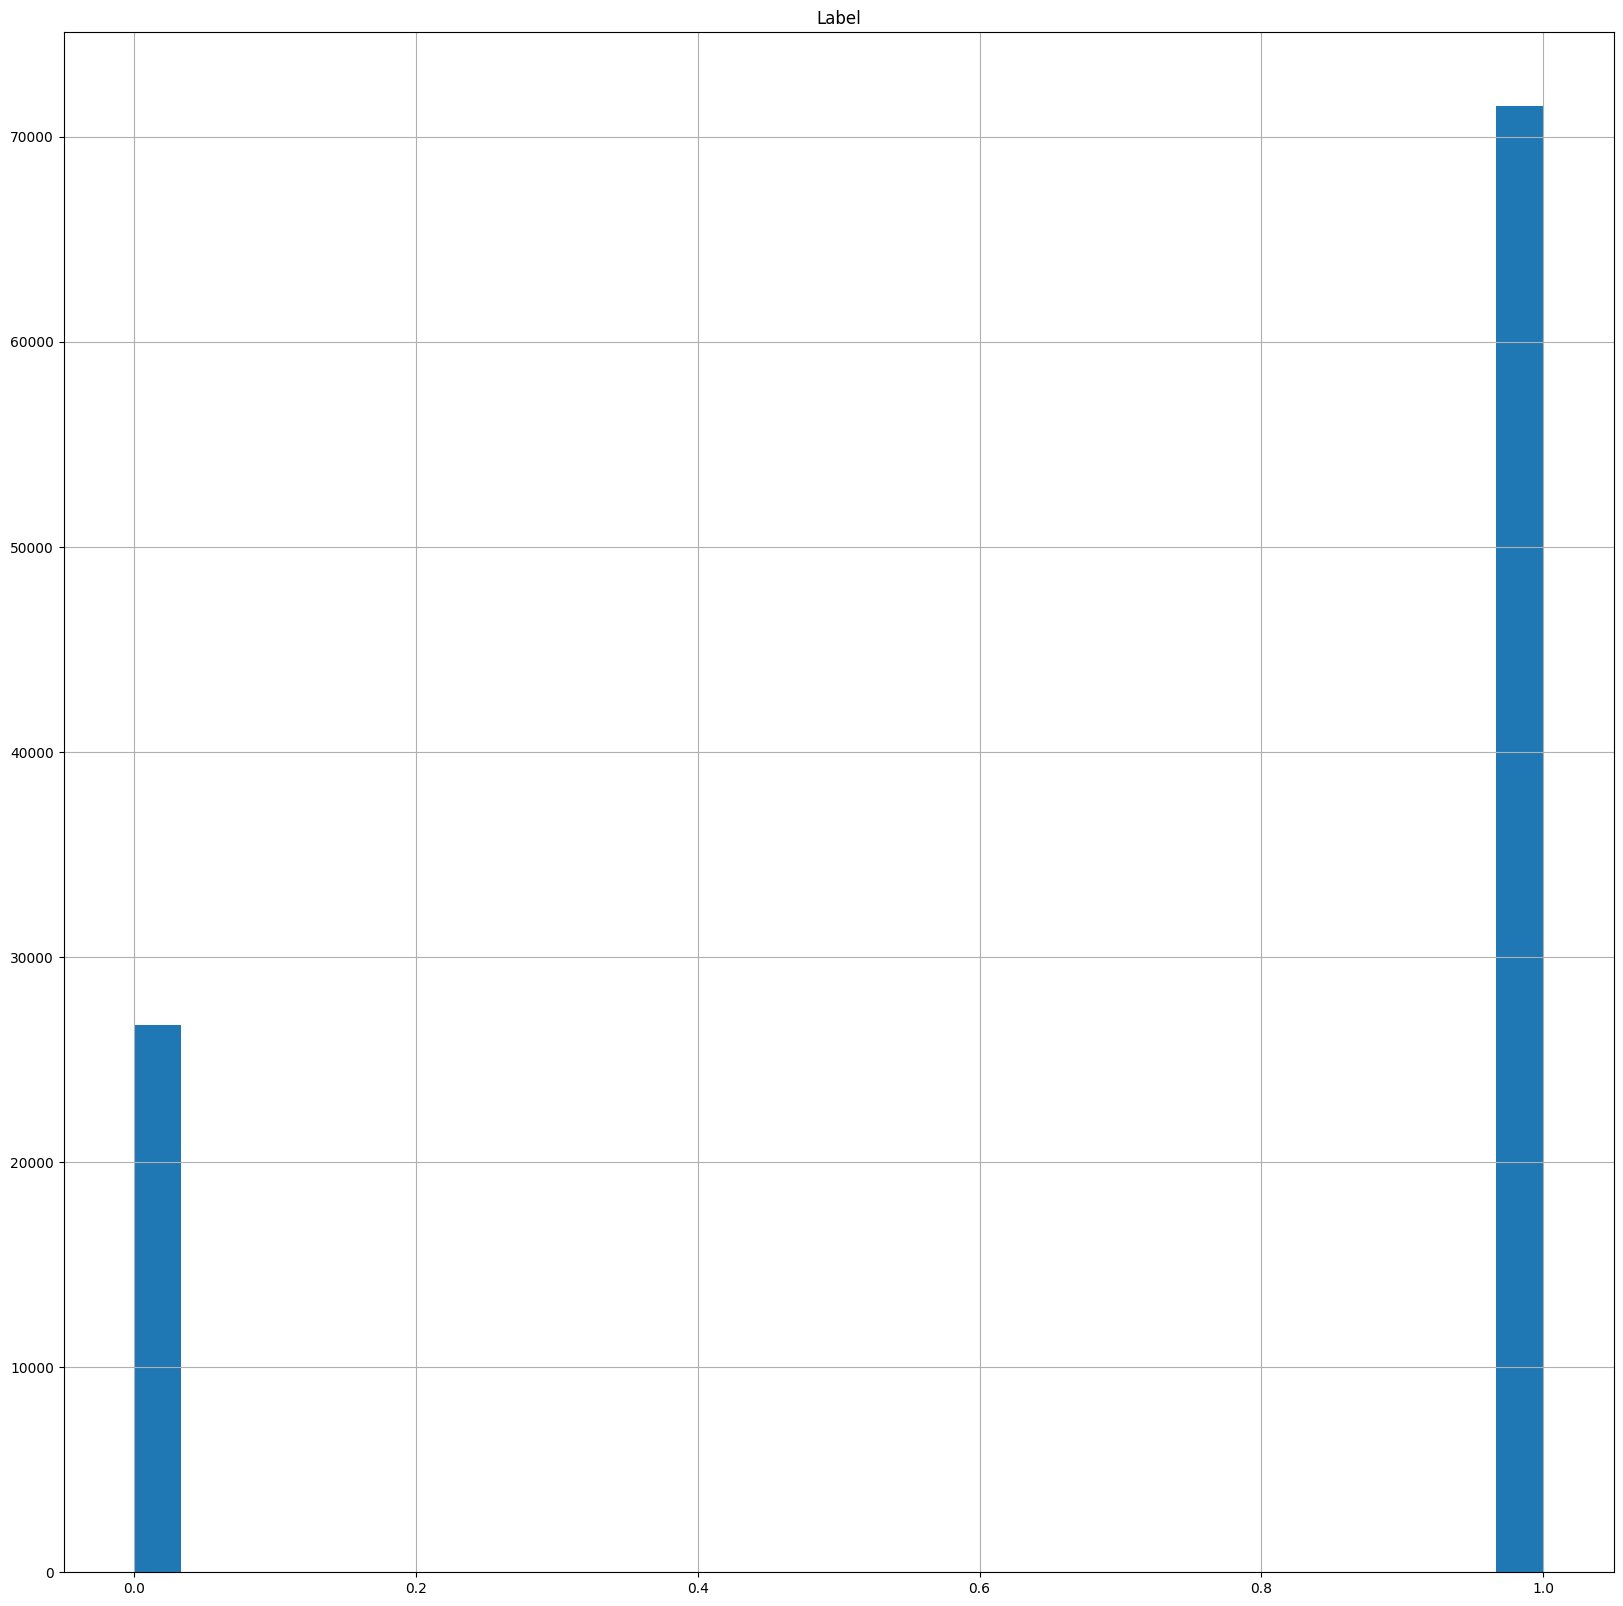

In [ ]:
data.hist(figsize=(20,20),bins=30 )
plt.show()

In [ ]:
data

,URL,Label
0,vitals.com/doctors/Dr_Wayne_Nelson.html,1
1,www.520168.cn/style/?us.battle.net/login/en/?r...,0
2,193.124.180.6/upload/_dispatch.php,0
3,home.earthlink.net/~mikhoc/,1
4,ilcockerrescue.org/memorialspage.htm,1
...,...,...
99994,sussexjazzkings.co.uk/paypal.co.uk/webscr/inde...,0
99995,alamedacountyfair.com/,1
99996,www.palosverdes.com/webdesign/,1
99997,susannazevi.com/,1


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = data['URL']
y = data['Label']

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# train_x = [x.text for x in training]
# train_y = [x.label for x in training]

# test_x = [x.text for x in testing]
# test_y = [x.label for x in testing]

In [ ]:
# X_train.shape

In [ ]:
# y_train.shape

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer()


X_train_tfidf = vectorizer.fit_transform(train_x)
X_test_tfidf = vectorizer.transform(test_x)


In [ ]:
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(X_train_tfidf, train_y)



SVC(kernel='linear')

In [ ]:
# test_y = clf_svm.predict(X_test_tfidf)

In [ ]:
clf_svm.score(X_test_tfidf, test_y)

0.9510283038077785

In [ ]:
import joblib


joblib.dump(clf_svm, 'trained_model.pkl')



['trained_model.pkl']

In [ ]:
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

In [ ]:
# from joblib import dump, load
# dump(clf_svm, 'phishing.joblib')